In [23]:
#Importo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#Importo la base de datos
data = pd.read_csv(
        'C:\\Users\\nahue\\Desktop\\Facultad\\Agro\\TP 8\\Van dobben.txt',
        delimiter = ' ',
        decimal = '.',
        engine = 'python',
        index_col=0,
        )
data.head()

,10,17.5,25,32
Especie,,,,
Trigo,110.0,70,52,47
Maíz,NaN,88,52,40
Centeno,70.0,40,33,30


In [24]:
data = data.T
data.head()

Especie,Trigo,Maíz,Centeno
10,110.0,NaN,70.0
17.5,70.0,88.0,40.0
25,52.0,52.0,33.0
32,47.0,40.0,30.0


In [28]:
data.columns

Index(['Trigo', 'Maíz', 'Centeno'], dtype='object', name='Especie')

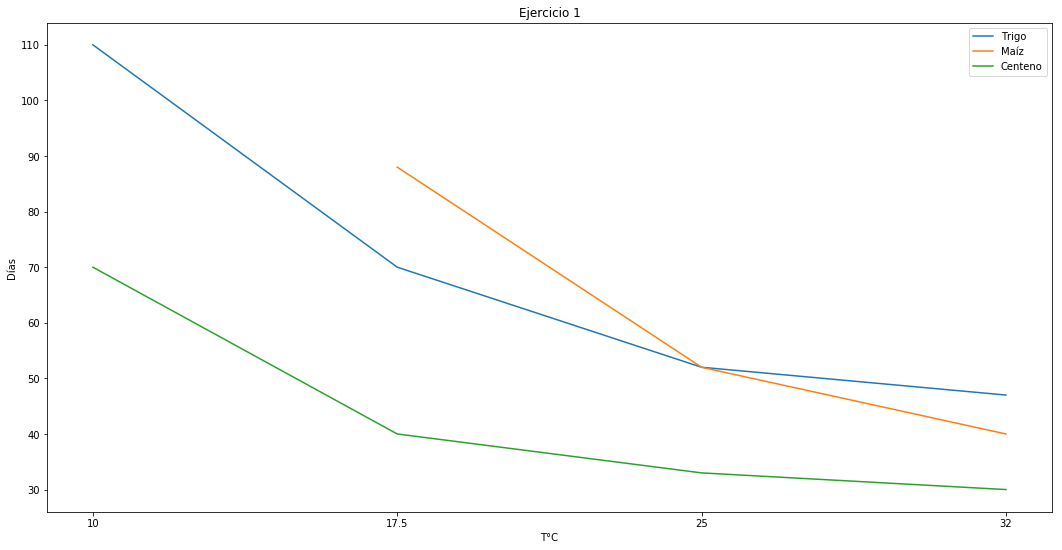

In [38]:
plt.figure(figsize=(18,9))
for i in data.columns:
    plt.plot(data[i], label = i)
plt.title('Ejercicio 1')
plt.xlabel("T°C")
plt.ylabel("Días")
plt.legend()

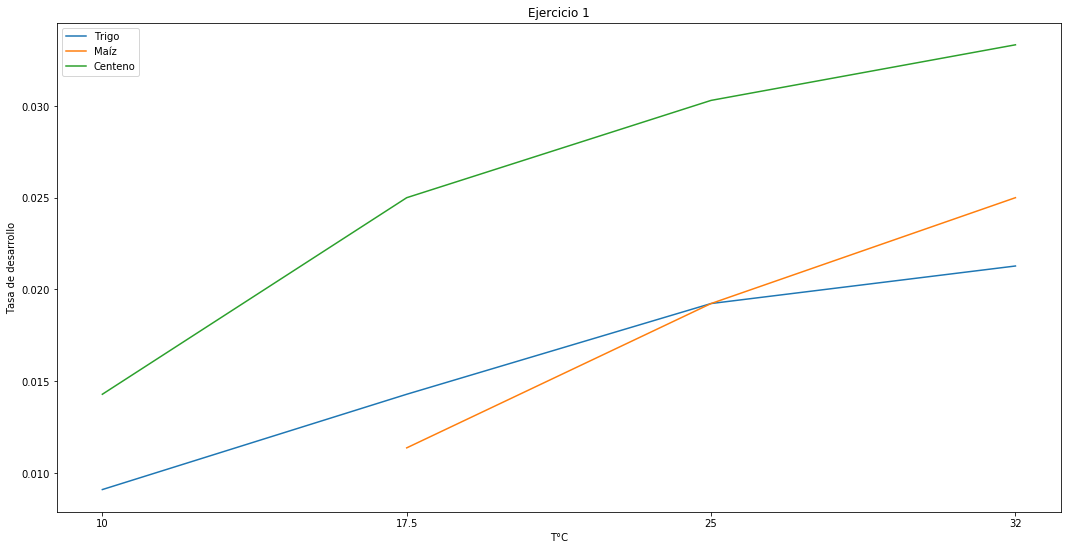

In [41]:
plt.figure(figsize=(18,9))
for i in data.columns:
    data[i] = 1/data[i]
    plt.plot(data[i], label = i)
plt.title('Ejercicio 1')
plt.xlabel("T°C")
plt.ylabel("Tasa de desarrollo")
plt.legend()

In [42]:
# A medida que baja la T, la tasa de crecimiento es menor para los 3 cultivos.
# Para una T° = 10°C, el maíz no crece, mientras que los otros cultivos aún crecen un poco.
# Sería conveniente sembrar los 3 cultivos en un lugar con T cercana a los 32°C

In [43]:
# Debería medirse la T° dentro del ser vivo, pero es más fácil y barato utilizar la T° del aire.

In [64]:
maiz = pd.read_csv(
        'C:\\Users\\nahue\\Desktop\\Facultad\\Agro\\TP 8\\maiz.txt',
        delimiter = ' ',
        decimal = '.',
        engine = 'python',
        )
maiz.head()

,Día,Tmáx,Tmín
0,150,28.9,13.3
1,151,29.9,13.3
2,152,26.8,8.0
3,153,27.1,15.0
4,154,27.2,20.0


In [89]:
max = maiz['Tmáx'].count()
triang_s = list(range(max))
dia_s = maiz['Día'][0]
for i in triang_s:
    if maiz['Tmín'][i] > 10:
        triang_s[i] = 6*(maiz['Tmáx'][i]+maiz['Tmín'][i]-2*10)/12
    else:
        triang_s[i] = 6*((maiz['Tmáx'][i]-10)**2/(maiz['Tmáx'][i]-maiz['Tmín'][i]))/12
    if i > 0:
        triang_s[i] = triang_s[i-1] + triang_s[i]
    if triang_s[i] < 220:
        dia_s = dia_s + 1
print(dia_s)

168


In [90]:
triang_d = list(range(max))
dia_d = maiz['Día'][0]
for i in triang_d:
    if i < max - 1:
        if maiz['Tmín'][i] > 10:
            triang_d[i] = 6*(maiz['Tmáx'][i]+maiz['Tmín'][i]-2*10)/24 + 6*(maiz['Tmáx'][i]+maiz['Tmín'][i+1]-2*10)/24
        else:
            triang_d[i] = 6*((maiz['Tmáx'][i]-10)**2/(maiz['Tmáx'][i]-maiz['Tmín'][i]))/24 + 6*((maiz['Tmáx'][i]-10)**2/(maiz['Tmáx'][i]-maiz['Tmín'][i+1]))/24
    else:
        if maiz['Tmín'][i] > 10:
            triang_d[i] = 6*(maiz['Tmáx'][i]+maiz['Tmín'][i]-2*10)/24
        else:
            triang_d[i] = 6*((maiz['Tmáx'][i]-10)**2/(maiz['Tmáx'][i]-maiz['Tmín'][i]))/24
    if i > 0:
        triang_d[i] = triang_d[i-1] + triang_d[i]
    if triang_s[i] < 220:
        dia_d = dia_d + 1
print(dia_d)

168


TypeError: '<' not supported between instances of 'list' and 'int'

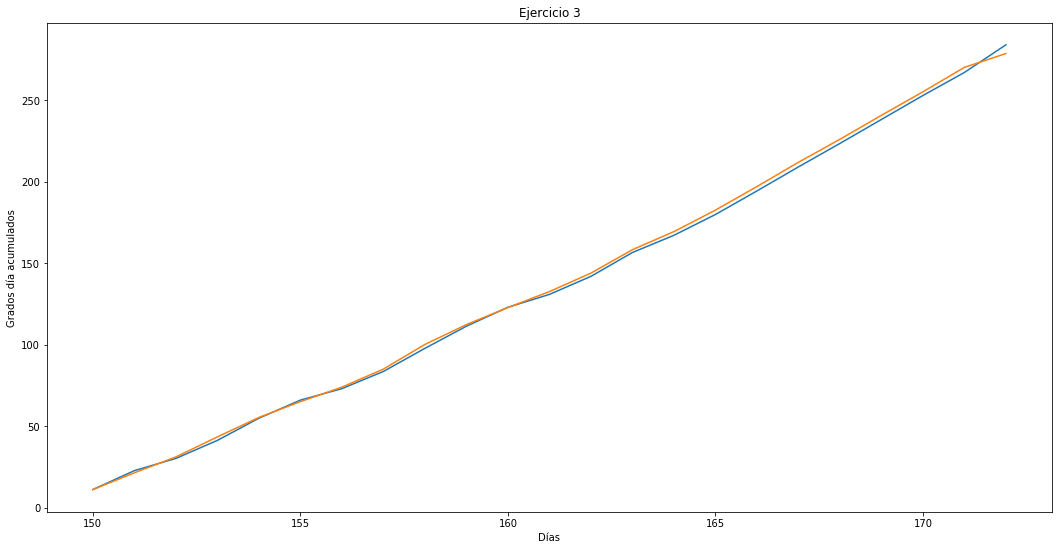

In [88]:
plt.figure(figsize=(18,9))
for i in [triang_s, triang_d]:
    plt.plot(maiz['Día'], i)
plt.title('Ejercicio 3')
plt.xlabel("Días")
plt.ylabel("Grados día acumulados")

In [101]:
ejercicio = pd.read_csv(
        'C:\\Users\\nahue\\Desktop\\Facultad\\Agro\\TP 8\\ejercicio.txt',
        delimiter = ' ',
        decimal = '.',
        engine = 'python',
        )
ejercicio.head(6)

,Caso,Día_min_n,Día_max_n,Día_min_n+1
0,1,96,110,91
1,2,91,105,96
2,3,45,54,38
3,4,60,80,75
4,5,60,100,75
5,6,50,101,48


In [92]:
# En los primeros 2 da 35 por cualquier método
# El tercero es cero

In [98]:
# Las diferencias máximas se dan en el caso 4 porque las T están en el rango
promedio = 20
triang_s = 6*(ejercicio['Día_max_n'][3]+ejercicio['Día_min_n'][3]-2*55)/12
triang_d = 6*(ejercicio['Día_max_n'][3]+ejercicio['Día_min_n'][3]-2*55)/24 + 6*(ejercicio['Día_max_n'][3]+ejercicio['Día_min_n+1'][3]-2*55)/24
seno_s = (ejercicio['Día_max_n'][3]+ejercicio['Día_min_n'][3]) /2 - 55
seno_d = ((ejercicio['Día_max_n'][3]+ejercicio['Día_min_n'][3]) /2 - 55)/2 + ((ejercicio['Día_max_n'][3]+ejercicio['Día_min_n+1'][3]) /2 - 55)/2
print(triang_s)
print(triang_d)
print(seno_s)
print(seno_d)
# promedio = 20
# En los otros casos las diferencias son menores

15.0
18.75
15.0
18.75


In [102]:
ejercicio['Día_min_n'] = (ejercicio['Día_min_n'] - 32) * 5/9
ejercicio['Día_max_n'] = (ejercicio['Día_max_n'] - 32) * 5/9
ejercicio['Día_min_n+1'] = (ejercicio['Día_min_n+1'] - 32) * 5/9
min = (55 - 32) * 5/9
max = (90 - 32) * 5/9
print(min,max)
ejercicio.head(6)

12.777777777777779 32.22222222222222


,Caso,Día_min_n,Día_max_n,Día_min_n+1
0,1,35.555556,43.333333,32.777778
1,2,32.777778,40.555556,35.555556
2,3,7.222222,12.222222,3.333333
3,4,15.555556,26.666667,23.888889
4,5,15.555556,37.777778,23.888889
5,6,10.000000,38.333333,8.888889


In [103]:
# Otra vez:
# En los primeros 2 da 35 por cualquier método
# El tercero es cero
# Las diferencias máximas se dan en el caso 4 porque las T están en el rango
# En los otros casos las diferencias son menores

In [105]:
promedio = 11.1
triang_s = 6*(ejercicio['Día_max_n'][3]+ejercicio['Día_min_n'][3]-2*12.78)/12
triang_d = 6*(ejercicio['Día_max_n'][3]+ejercicio['Día_min_n'][3]-2*12.78)/24 + 6*(ejercicio['Día_max_n'][3]+ejercicio['Día_min_n+1'][3]-2*12.78)/24
seno_s = (ejercicio['Día_max_n'][3]+ejercicio['Día_min_n'][3]) /2 - 12.78
seno_d = ((ejercicio['Día_max_n'][3]+ejercicio['Día_min_n'][3]) /2 - 12.78)/2 + ((ejercicio['Día_max_n'][3]+ejercicio['Día_min_n+1'][3]) /2 - 12.78)/2
print(triang_s)
print(triang_d)
print(seno_s)
print(seno_d)

8.331111111111111
10.414444444444445
8.331111111111111
10.414444444444445


In [ ]:
# Son los mismos grados F, pero *5/9